In [1]:
import tensorflow.compat.v1 as tf
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib
import matplotlib.pyplot as plt
import time
import os

np.random.seed(1)
tf.set_random_seed(1)
tf.compat.v1.disable_eager_execution()
a=0
b=1
c=0
d=1
###########定义网络
class PhysicsInformedNN:
    # Initialize the class
    def __init__(self, layers_U, layers_V1,layers_V2,layers_V3,layers_V4,layers_V5,layers_W1,layers_W2,layers_W3,layers_W4,layers_W5, x_range, t_range, f, num_train_tps):

        # Initialize NNs
        self.layers_U = layers_U
        self.weights_U, self.biases_U, self.adaps_U = self.initialize_NN(layers_U)
        self.layers_V1 = layers_V1
        self.weights_V1, self.biases_V1, self.adaps_V1 = self.initialize_NN(layers_V1)
        self.layers_V2 = layers_V2
        self.weights_V2, self.biases_V2, self.adaps_V2 = self.initialize_NN(layers_V2)
        self.layers_V3 = layers_V3
        self.weights_V3, self.biases_V3, self.adaps_V3 = self.initialize_NN(layers_V3)
        self.layers_V4 = layers_V4
        self.weights_V4, self.biases_V4, self.adaps_V4 = self.initialize_NN(layers_V4)
        self.layers_V5 = layers_V5
        self.weights_V5, self.biases_V5, self.adaps_V5 = self.initialize_NN(layers_V5)
        self.layers_W1 = layers_W1
        self.weights_W1, self.biases_W1, self.adaps_W1 = self.initialize_NN(layers_W1)
        self.layers_W2 = layers_W2
        self.weights_W2, self.biases_W2, self.adaps_W2 = self.initialize_NN(layers_W2)
        self.layers_W3 = layers_W3
        self.weights_W3, self.biases_W3, self.adaps_W3 = self.initialize_NN(layers_W3)
        self.layers_W4 = layers_W4
        self.weights_W4, self.biases_W4, self.adaps_W4 = self.initialize_NN(layers_W4)
        self.layers_W5 = layers_W5
        self.weights_W5, self.biases_W5, self.adaps_W5 = self.initialize_NN(layers_W5)
        # Parameters
        self.t_range =t_range
        self.x_range = x_range
        self.lb = np.array([ x_range[0],t_range[0]])
        self.ub = np.array([ x_range[1],t_range[1]])

        # Output file
        self.f = f

        self.tx_tf = tf.placeholder(tf.float32, shape=[None, 1])
        self.xx_tf = tf.placeholder(tf.float32, shape=[None, 1])
        # Test Points                           ######################测试点
        self.t_test_tf = tf.placeholder(tf.float32, shape=[None, 1])
        self.x_test_tf = tf.placeholder(tf.float32, shape=[None, 1])

        # Generate Training and Testing Points  ########################生成训练和测试点
        self.generateTrain(num_train_tps)

        # Physics
        # Interior (IDE)  #############PDE

        self.gf,self.f, self.e1, self.e2,self.e3, self.e4,self.e5, self.e6,self.e7, self.e8,self.e9, self.e10,self.Uf, self.V1f,self.V2f,self.V3f,self.V4f,self.V5f,\
        self.W1f,self.W2f,self.W3f,self.W4f,self.W5f,self.U_xf,self.U_tf,self.U_ttf,self.V1_xf,self.V2_xf,self.V3_xf,self.V4_xf,self.V5_xf,\
        self.W1_tf,self.W2_tf,self.W3_tf,self.W4_tf,self.W5_tf= self.pinn(self.tt,self.xf)
        #chushi
        _,_, _,_,_,_, _,_,_, _,_, _, self.Ui, self.V1i,self.V2i,self.V3i,self.V4i,self.V5i,self.W1i,self.W2i,self.W3i,self.W4i,self.W5i,self.U_xi,self.U_ti,self.U_tti,\
        self.V1_xi,self.V2_xi,self.V3_xi,self.V4_xi,self.V5_xi,self.W1_ti,self.W2_ti,self.W3_ti,self.W4_ti,self.W5_ti = self.pinn(self.ti,self.xi)
        _,_, _,_,_,_, _,_,_, _,_, _, self.Ub, self.V1b,self.V2b,self.V3b,self.V4b, self.V5b,self.W1b,self.W2b,self.W3b,self.W4b,self.W5b, self.U_xb, self.U_tb, \
        self.U_ttb, self.V1_xb,self.V2_xb,self.V3_xb,self.V4_xb, self.V5_xb,self.W1_tb,self.W2_tb,self.W3_tb,self.W4_tb,self.W5_tb= self.pinn(self.tb, self.xb)
        _, _, _, _, _, _, _, _,_, _, _, _,self.Ub2, self.V1b2, self.V2b2, self.V3b2,self.V4b2, self.V5b2, self.W1b2, self.W2b2, self.W3b2, self.W4b2, self.W5b2,\
        self.U_xb2, self.U_tb2, self.U_ttb2, self.V1_xb2, self.V2_xb2, self.V3_xb2, self.V4_xb2,self.V5_xb2,self.W1_tb2, self.W2_tb2, self.W3_tb2, self.W4_tb2, self.W5_tb2  \
            = self.pinn( self.tb2, self.xb2)
        # Test
        _, self.f_test,self.e1_test, self.e2_test,self.e3_test, self.e4_test,self.e5_test, self.e6_test,self.e7_test,self.e8_test,self.e9_test,self.e10_test,\
        self.U_test, self.V1_test, self.V2_test, self.V3_test,self.V4_test,self.V5_test, self.W1_test,self.W2_test,self.W3_test,self.W4_test, self.W5_test,\
        self.U_x_test, self.U_t_test, self.U_tt_test, self.V1_x_test,self.V2_x_test,self.V3_x_test,self.V4_x_test,self.V5_x_test, self.W1_t_test,self.W2_t_test,\
        self.W3_t_test,self.W4_t_test,self.W5_t_test=self.pinn(self.t_test_tf,self.x_test_tf)

        # Interior (IDE)
        self.loss_f = tf.reduce_mean((self.gf+(2*self.tt**3*(self.tt-1)**2*(self.tt+1)**2)*(self.V1f-self.V2f+self.V3f-self.V4f+self.V5f)+self.U_xf-self.U_tf- self.Uf-self.U_ttf) ** 2)
        self.loss_e1 = tf.reduce_mean((self.V1_xf - self.W1f) ** 2)
        self.loss_e2= tf.reduce_mean((self.V2_xf -self.tt**2*self.xf**2*self.W2f*0.5) ** 2)
        self.loss_e3 = tf.reduce_mean((self.V3_xf - (self.tt ** 4 * self.xf ** 4 * self.W3f)/24) ** 2)
        self.loss_e4 = tf.reduce_mean((self.V4_xf - (self.tt ** 6 * self.xf ** 6 * self.W4f) / 720) ** 2)
        self.loss_e5 = tf.reduce_mean((self.V5_xf - (self.tt ** 8 * self.xf ** 8 * self.W5f) / 40320) ** 2)
        self.loss_e6 = tf.reduce_mean((self.W1_tf - self.Uf ) ** 2)
        self.loss_e7 = tf.reduce_mean((self.W2_tf - self.tt**2*self.Uf) ** 2)
        self.loss_e8 = tf.reduce_mean((self.W3_tf - self.tt**4*self.Uf) ** 2)
        self.loss_e9 = tf.reduce_mean((self.W4_tf - self.tt ** 6 * self.Uf) ** 2)
        self.loss_e10 = tf.reduce_mean((self.W5_tf - self.tt ** 8 * self.Uf) ** 2)
        # 初始条件和边界条件
        self.loss_i= tf.reduce_mean((self.Ui-self.xi) ** 2)+tf.reduce_mean((self.U_ti-self.xi**2) ** 2)+ tf.reduce_mean((self.W1i) ** 2)+ \
                     tf.reduce_mean((self.W2i) ** 2)+ tf.reduce_mean((self.W3i) ** 2)+ tf.reduce_mean((self.W4i) ** 2)\
                     + tf.reduce_mean((self.W5i) ** 2)
        self.loss_b1= tf.reduce_mean((self.Ub) ** 2) +tf.reduce_mean((self.V1b) ** 2) + tf.reduce_mean((self.V2b) ** 2) + tf.reduce_mean((self.V3b) ** 2)\
                     + tf.reduce_mean((self.V4b) ** 2)+ tf.reduce_mean((self.V5b) ** 2)
        self.loss_b2 = tf.reduce_mean((self.Ub2 - tf.sin(self.tb2)-1) ** 2)

        # # Total Loss
        self.loss = self.loss_f*1+ self.loss_e1*1+ self.loss_e2*1+self.loss_e3*100+self.loss_e4*1000+self.loss_e5*1000\
                    + self.loss_e6*1+self.loss_e7*1+self.loss_e8*1 +  self.loss_e9*1+ self.loss_e10*1+self.loss_i*1+self.loss_b1*1+self.loss_b2*1

        # Optimizer
        self.optimizer_Adam = tf.train.AdamOptimizer()
        self.train_op_Adam = self.optimizer_Adam.minimize(self.loss)

        # tf session
        self.sess = tf.Session()
        init = tf.global_variables_initializer()
        self.sess.run(init)

 #####################初始化神经网络参数

    def initialize_NN(self, layers):
        weights = []
        biases = []
        adaps = []
        num_layers = len(layers)
        for l in range(0, num_layers - 1):
            W = self.xavier_init(size=[layers[l], layers[l + 1]])
            b = tf.Variable(tf.zeros([1, layers[l + 1]], dtype=tf.float32), dtype=tf.float32)
            a = tf.Variable(1.0, dtype=tf.float32)
            weights.append(W)
            biases.append(b)
            adaps.append(a)
        return weights, biases, adaps

    def xavier_init(self, size):
        in_dim = size[0]
        out_dim = size[1]
        xavier_stddev = np.sqrt(2 / (in_dim + out_dim))
        return tf.Variable(tf.truncated_normal([in_dim, out_dim], stddev=xavier_stddev), dtype=tf.float32)

    def net_U(self, X):
        weights = self.weights_U
        biases = self.biases_U
        adaps = self.adaps_U
        num_layers = len(weights) + 1
        h = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            a = adaps[l]
            h = tf.tanh(tf.multiply(a, tf.add(tf.matmul(h, W), b)))
        W = weights[-1]
        b = biases[-1]
        U = tf.add(tf.matmul(h, W), b)
        return U

    def net_V1(self, X):
        weights = self.weights_V1
        biases = self.biases_V1
        adaps = self.adaps_V1
        num_layers = len(weights) + 1
        h = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            a = adaps[l]
            h = tf.tanh(tf.multiply(a, tf.add(tf.matmul(h, W), b)))
        W = weights[-1]
        b = biases[-1]
        V1 = tf.add(tf.matmul(h, W), b)
        return V1
    def net_V2(self, X):
        weights = self.weights_V2
        biases = self.biases_V2
        adaps = self.adaps_V2
        num_layers = len(weights) + 1
        h = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            a = adaps[l]
            h = tf.tanh(tf.multiply(a, tf.add(tf.matmul(h, W), b)))
        W = weights[-1]
        b = biases[-1]
        V2= tf.add(tf.matmul(h, W), b)
        return V2
    def net_V3(self, X):
        weights = self.weights_V3
        biases = self.biases_V3
        adaps = self.adaps_V3
        num_layers = len(weights) + 1
        h = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            a = adaps[l]
            h = tf.tanh(tf.multiply(a, tf.add(tf.matmul(h, W), b)))
        W = weights[-1]
        b = biases[-1]
        V3 = tf.add(tf.matmul(h, W), b)
        return V3

    def net_V4(self, X):
        weights = self.weights_V4
        biases = self.biases_V4
        adaps = self.adaps_V4
        num_layers = len(weights) + 1
        h = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            a = adaps[l]
            h = tf.tanh(tf.multiply(a, tf.add(tf.matmul(h, W), b)))
        W = weights[-1]
        b = biases[-1]
        V4 = tf.add(tf.matmul(h, W), b)
        return V4
    def net_V5(self, X):
        weights = self.weights_V5
        biases = self.biases_V5
        adaps = self.adaps_V5
        num_layers = len(weights) + 1
        h = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            a = adaps[l]
            h = tf.tanh(tf.multiply(a, tf.add(tf.matmul(h, W), b)))
        W = weights[-1]
        b = biases[-1]
        V5 = tf.add(tf.matmul(h, W), b)
        return V5
    def net_W1(self, X):
        weights = self.weights_W1
        biases = self.biases_W1
        adaps = self.adaps_W1
        num_layers = len(weights) + 1
        h = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            a = adaps[l]
            h = tf.tanh(tf.multiply(a, tf.add(tf.matmul(h, W), b)))
        W = weights[-1]
        b = biases[-1]
        W1= tf.add(tf.matmul(h, W), b)
        return W1
    def net_W2(self, X):
        weights = self.weights_W2
        biases = self.biases_W2
        adaps = self.adaps_W2
        num_layers = len(weights) + 1
        h = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            a = adaps[l]
            h = tf.tanh(tf.multiply(a, tf.add(tf.matmul(h, W), b)))
        W = weights[-1]
        b = biases[-1]
        W2= tf.add(tf.matmul(h, W), b)
        return W2
    def net_W3(self, X):
        weights = self.weights_W3
        biases = self.biases_W3
        adaps = self.adaps_W3
        num_layers = len(weights) + 1
        h = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            a = adaps[l]
            h = tf.tanh(tf.multiply(a, tf.add(tf.matmul(h, W), b)))
        W = weights[-1]
        b = biases[-1]
        W3= tf.add(tf.matmul(h, W), b)
        return W3
    def net_W4(self, X):
        weights = self.weights_W4
        biases = self.biases_W4
        adaps = self.adaps_W4
        num_layers = len(weights) + 1
        h = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            a = adaps[l]
            h = tf.tanh(tf.multiply(a, tf.add(tf.matmul(h, W), b)))
        W = weights[-1]
        b = biases[-1]
        W4= tf.add(tf.matmul(h, W), b)
        return W4
    def net_W5(self, X):
        weights = self.weights_W5
        biases = self.biases_W5
        adaps = self.adaps_W5
        num_layers = len(weights) + 1
        h = 2.0 * (X - self.lb) / (self.ub - self.lb) - 1.0
        for l in range(0, num_layers - 2):
            W = weights[l]
            b = biases[l]
            a = adaps[l]
            h = tf.tanh(tf.multiply(a, tf.add(tf.matmul(h, W), b)))
        W = weights[-1]
        b = biases[-1]
        W5= tf.add(tf.matmul(h, W), b)
        return W5
    def pinn(self,t,x):
        X=tf.concat([t,x],1)
        U = self.net_U(X)
        V1 = self.net_V1(X)
        V2 = self.net_V2(X)
        V3 = self.net_V3(X)
        V4 = self.net_V4(X)
        V5 = self.net_V5(X)
        W1= self.net_W1(X)
        W2 = self.net_W2(X)
        W3 = self.net_W3(X)
        W4 = self.net_W4(X)
        W5 = self.net_W5(X)

        gf=(-x**3+x-1)*tf.sin(t*x)+(x**2-x*t)*tf.cos(t*x)+(2*t**4-4*t**2+2)*tf.cos(t**2*x)-(t**4+2*t**3+t**2)*tf.sin(x*t**2-x*t) \
           + (t ** 4 - 2 * t ** 3 + t ** 2) * tf.sin(x * t ** 2 + x * t)+(2*t**5-2*t**3+1)*x-2*t**4+4*t**2-3

        U_x = tf.gradients(U, x)
        U_t = tf.gradients(U, t)
        U_tt = tf.gradients( U_t, t)
        V1_x = tf.gradients(V1, x)
        W1_t = tf.gradients(W1, t)
        V2_x = tf.gradients(V2, x)
        W2_t = tf.gradients(W2, t)
        V3_x = tf.gradients(V3, x)
        W3_t = tf.gradients(W3, t)
        V4_x = tf.gradients(V4, x)
        W4_t = tf.gradients(W4, t)
        V5_x = tf.gradients(V5, x)
        W5_t = tf.gradients(W5, t)

        f = gf+(2*t**3*(t-1)**2*(t+1)**2)*(V1-V2+V3-V4+V5)-U_tt+U_x-U_t-U
        e1 =V1_x -W1
        e2 =V2_x -t**2*x**2* W2*0.5
        e3 = V3_x -(t**4*x**4* W3)/24
        e4 = V4_x - (t ** 6 * x ** 6 * W4) / 720
        e5 = V5_x - (t ** 8 * x ** 8 * W5) / 40320
        e6 = W1_t -  U
        e7 = W2_t -  t **2* U
        e8 =  W3_t -  t **4* U
        e9 = W4_t - t ** 6 * U
        e10 = W5_t - t ** 8 * U
        return gf,f, e1,e2,e3,e4,e5,e6,e7,e8,e9,e10, U, V1,V2,V3,V4, V5,W1,W2,W3,W4,W5,U_x,U_t,U_tt, V1_x,V2_x,V3_x,\
               V4_x,V5_x,W1_t,W2_t,W3_t,W4_t,W5_t


    def generateTrain(self, num_train_tps ):
        tt = tf.linspace(np.float32(self.t_range[0]), np.float32(self.t_range[1]),5000)
        self.tt = tf.reshape(tt, [-1, 1])
        xf = tf.linspace(np.float32(self.x_range[0]), np.float32(self.x_range[1]), 5000 )
        self.xf = tf.reshape(xf, [-1, 1])

        xi =tf.linspace(np.float32(self.x_range[0]), np.float32(self.x_range[1]), 100 )
        ti =self.t_range[0] * tf.ones(xi.shape)
        self.ti = tf.reshape(ti, [-1, 1])
        self.xi = tf.reshape(xi, [-1, 1])


        tb = tf.linspace(np.float32(self.t_range[0]), np.float32(self.t_range[1]), 100)
        xb = self.x_range[0] * tf.ones(tb.shape)
        self.tb = tf.reshape(tb, [-1, 1])
        self.xb = tf.reshape(xb, [-1, 1])


        tb2 = tf.linspace(np.float32(self.t_range[0]), np.float32(self.t_range[1]),100)
        xb2 = self.x_range[1] * tf.ones(tb2.shape)
        self.tb2 = tf.reshape(tb2, [-1, 1])
        self.xb2 = tf.reshape(xb2, [-1, 1])

        return

    def train(self, Xx,  it, num_train_tps ):
        tx = np.linspace(self.t_range[0], self.t_range[1],num_train_tps)
        tx = np.reshape(tx, [-1, 1])
        xx = np.linspace(self.x_range[0], self.x_range[1],num_train_tps )
        xx = np.reshape(xx, [-1, 1])

        tf_dict = {self.xx_tf: tx,self.tx_tf: xx}

        self.sess.run(self.train_op_Adam, tf_dict)

        loss_value, loss_value_f,loss_value_e1,loss_value_e2,loss_value_e3,loss_value_e4,loss_value_e5,loss_value_e6,loss_value_e7,\
        loss_value_e8,loss_value_e9,loss_value_e10,loss_value_i,loss_value_b1,loss_value_b2= self.sess.run(
            [self.loss, self.loss_f,self.loss_e1,self.loss_e2,self.loss_e3,self.loss_e4,self.loss_e5,self.loss_e6,self.loss_e7,
             self.loss_e8,self.loss_e9,self.loss_e10,self.loss_i,self.loss_b1,self.loss_b2
             ], tf_dict)
        loss_value_array = [loss_value_f*1,loss_value_e1*1,loss_value_e2*1,loss_value_e3*100,loss_value_e4*1000,loss_value_e5*1000,
                            loss_value_e6*1,loss_value_e7*1,loss_value_e8*1,loss_value_e9*1,loss_value_e10*1,
                            loss_value_i*1,loss_value_b1*1,loss_value_b2*1]

        np.set_printoptions(precision=6)
        content = 'It: %d, Loss: %.3e' % (it, loss_value) 
        print(content, flush=True)
        return loss_value, loss_value_array

    def test(self, num_test_tps ):
        t = np.linspace(self.t_range[0], self.t_range[1], num_test_tps)
        t_2D = np.matmul(t[:, None], np.ones((1, num_test_tps)))
        t_test = np.reshape(t_2D, [-1, 1])
        x = np.linspace(self.x_range[0], self.x_range[1],num_test_tps)
        x_2D = np.matmul(np.ones((num_test_tps, 1)), x[None, :])
        x_test = np.reshape(x_2D, [-1, 1])
        tf_dict = {self.t_test_tf: t_test, self.x_test_tf: x_test}

        U_test = self.sess.run(self.U_test, tf_dict)
        V1_test = self.sess.run(self.V1_test, tf_dict)
        V2_test = self.sess.run(self.V2_test, tf_dict)
        V3_test = self.sess.run(self.V3_test, tf_dict)
        V4_test = self.sess.run(self.V4_test, tf_dict)
        V5_test = self.sess.run(self.V5_test, tf_dict)
        W1_test = self.sess.run(self.W1_test, tf_dict)
        W2_test = self.sess.run(self.W2_test, tf_dict)
        W3_test = self.sess.run(self.W3_test, tf_dict)
        W4_test = self.sess.run(self.W4_test, tf_dict)
        W5_test = self.sess.run(self.W5_test, tf_dict)
        f_test = self.sess.run(self.f_test, tf_dict)
        e1_test = self.sess.run(self.e1_test, tf_dict)
        e2_test = self.sess.run(self.e2_test, tf_dict)
        e3_test = self.sess.run(self.e3_test, tf_dict)
        e4_test = self.sess.run(self.e4_test, tf_dict)
        e5_test = self.sess.run(self.e5_test, tf_dict)
        e6_test = self.sess.run(self.e6_test, tf_dict)
        e7_test = self.sess.run(self.e7_test, tf_dict)
        e8_test = self.sess.run(self.e8_test, tf_dict)
        e9_test = self.sess.run(self.e9_test, tf_dict)
        e10_test = self.sess.run(self.e10_test, tf_dict)
        X_test = np.hstack((t_test,x_test))

        return X_test, U_test, V1_test,V2_test,V3_test,V4_test,V5_test,W1_test,W2_test,W3_test,W4_test, W5_test,f_test,\
               e1_test,e2_test,e3_test,e4_test,e5_test,e6_test,e7_test,e8_test,e9_test,e10_test


It: 1, Loss: 2.079e+01
It: 2, Loss: 2.068e+01
It: 3, Loss: 3.935e+01
It: 4, Loss: 4.202e+01
It: 5, Loss: 3.209e+01
It: 6, Loss: 1.799e+01
It: 7, Loss: 6.712e+00
It: 8, Loss: 3.437e+00
It: 9, Loss: 7.590e+00
It: 10, Loss: 1.400e+01
It: 11, Loss: 1.724e+01
It: 12, Loss: 1.537e+01
It: 13, Loss: 1.027e+01
It: 14, Loss: 5.151e+00
It: 15, Loss: 2.236e+00
It: 16, Loss: 1.896e+00
It: 17, Loss: 3.108e+00
It: 18, Loss: 4.569e+00
It: 19, Loss: 5.471e+00
It: 20, Loss: 5.611e+00
It: 21, Loss: 5.124e+00
It: 22, Loss: 4.210e+00
It: 23, Loss: 3.058e+00
It: 24, Loss: 1.927e+00
It: 25, Loss: 1.160e+00
It: 26, Loss: 1.012e+00
It: 27, Loss: 1.458e+00
It: 28, Loss: 2.167e+00
It: 29, Loss: 2.685e+00
It: 30, Loss: 2.707e+00
It: 31, Loss: 2.250e+00
It: 32, Loss: 1.592e+00
It: 33, Loss: 1.056e+00
It: 34, Loss: 8.088e-01
It: 35, Loss: 8.227e-01
It: 36, Loss: 9.589e-01
It: 37, Loss: 1.097e+00
It: 38, Loss: 1.190e+00
It: 39, Loss: 1.229e+00
It: 40, Loss: 1.204e+00
It: 41, Loss: 1.092e+00
It: 42, Loss: 9.008e-01
I

It: 334, Loss: 2.464e-02
It: 335, Loss: 3.053e-02
It: 336, Loss: 3.681e-02
It: 337, Loss: 3.837e-02
It: 338, Loss: 2.905e-02
It: 339, Loss: 1.502e-02
It: 340, Loss: 1.406e-02
It: 341, Loss: 2.272e-02
It: 342, Loss: 2.319e-02
It: 343, Loss: 1.556e-02
It: 344, Loss: 1.318e-02
It: 345, Loss: 1.632e-02
It: 346, Loss: 1.610e-02
It: 347, Loss: 1.345e-02
It: 348, Loss: 1.309e-02
It: 349, Loss: 1.299e-02
It: 350, Loss: 1.193e-02
It: 351, Loss: 1.200e-02
It: 352, Loss: 1.201e-02
It: 353, Loss: 1.054e-02
It: 354, Loss: 9.961e-03
It: 355, Loss: 1.087e-02
It: 356, Loss: 1.046e-02
It: 357, Loss: 8.879e-03
It: 358, Loss: 8.952e-03
It: 359, Loss: 9.748e-03
It: 360, Loss: 8.915e-03
It: 361, Loss: 7.905e-03
It: 362, Loss: 8.282e-03
It: 363, Loss: 8.497e-03
It: 364, Loss: 7.771e-03
It: 365, Loss: 7.384e-03
It: 366, Loss: 7.539e-03
It: 367, Loss: 7.390e-03
It: 368, Loss: 7.054e-03
It: 369, Loss: 6.932e-03
It: 370, Loss: 6.790e-03
It: 371, Loss: 6.584e-03
It: 372, Loss: 6.522e-03
It: 373, Loss: 6.438e-03


It: 662, Loss: 1.966e-03
It: 663, Loss: 1.967e-03
It: 664, Loss: 1.968e-03
It: 665, Loss: 1.968e-03
It: 666, Loss: 1.964e-03
It: 667, Loss: 1.957e-03
It: 668, Loss: 1.951e-03
It: 669, Loss: 1.947e-03
It: 670, Loss: 1.946e-03
It: 671, Loss: 1.947e-03
It: 672, Loss: 1.950e-03
It: 673, Loss: 1.955e-03
It: 674, Loss: 1.961e-03
It: 675, Loss: 1.972e-03
It: 676, Loss: 1.990e-03
It: 677, Loss: 2.022e-03
It: 678, Loss: 2.076e-03
It: 679, Loss: 2.165e-03
It: 680, Loss: 2.316e-03
It: 681, Loss: 2.562e-03
It: 682, Loss: 2.979e-03
It: 683, Loss: 3.660e-03
It: 684, Loss: 4.807e-03
It: 685, Loss: 6.593e-03
It: 686, Loss: 9.424e-03
It: 687, Loss: 1.309e-02
It: 688, Loss: 1.764e-02
It: 689, Loss: 2.045e-02
It: 690, Loss: 2.056e-02
It: 691, Loss: 1.499e-02
It: 692, Loss: 7.690e-03
It: 693, Loss: 2.761e-03
It: 694, Loss: 3.323e-03
It: 695, Loss: 7.273e-03
It: 696, Loss: 9.670e-03
It: 697, Loss: 8.207e-03
It: 698, Loss: 4.211e-03
It: 699, Loss: 2.227e-03
It: 700, Loss: 3.658e-03
It: 701, Loss: 5.860e-03


It: 990, Loss: 2.320e-03
It: 991, Loss: 2.667e-03
It: 992, Loss: 3.130e-03
It: 993, Loss: 3.785e-03
It: 994, Loss: 4.574e-03
It: 995, Loss: 5.621e-03
It: 996, Loss: 6.739e-03
It: 997, Loss: 8.093e-03
It: 998, Loss: 9.056e-03
It: 999, Loss: 9.728e-03
It: 1000, Loss: 9.158e-03
It: 1001, Loss: 7.803e-03
It: 1002, Loss: 5.511e-03
It: 1003, Loss: 3.273e-03
It: 1004, Loss: 1.687e-03
It: 1005, Loss: 1.235e-03
It: 1006, Loss: 1.812e-03
It: 1007, Loss: 2.861e-03
It: 1008, Loss: 3.735e-03
It: 1009, Loss: 3.893e-03
It: 1010, Loss: 3.383e-03
It: 1011, Loss: 2.435e-03
It: 1012, Loss: 1.604e-03
It: 1013, Loss: 1.226e-03
It: 1014, Loss: 1.369e-03
It: 1015, Loss: 1.820e-03
It: 1016, Loss: 2.238e-03
It: 1017, Loss: 2.384e-03
It: 1018, Loss: 2.167e-03
It: 1019, Loss: 1.763e-03
It: 1020, Loss: 1.383e-03
It: 1021, Loss: 1.202e-03
It: 1022, Loss: 1.249e-03
It: 1023, Loss: 1.434e-03
It: 1024, Loss: 1.627e-03
It: 1025, Loss: 1.711e-03
It: 1026, Loss: 1.656e-03
It: 1027, Loss: 1.492e-03
It: 1028, Loss: 1.315e

It: 1306, Loss: 8.031e-04
It: 1307, Loss: 8.019e-04
It: 1308, Loss: 8.007e-04
It: 1309, Loss: 7.994e-04
It: 1310, Loss: 7.983e-04
It: 1311, Loss: 7.972e-04
It: 1312, Loss: 7.962e-04
It: 1313, Loss: 7.955e-04
It: 1314, Loss: 7.952e-04
It: 1315, Loss: 7.956e-04
It: 1316, Loss: 7.971e-04
It: 1317, Loss: 8.007e-04
It: 1318, Loss: 8.080e-04
It: 1319, Loss: 8.222e-04
It: 1320, Loss: 8.490e-04
It: 1321, Loss: 8.991e-04
It: 1322, Loss: 9.921e-04
It: 1323, Loss: 1.168e-03
It: 1324, Loss: 1.494e-03
It: 1325, Loss: 2.117e-03
It: 1326, Loss: 3.264e-03
It: 1327, Loss: 5.462e-03
It: 1328, Loss: 9.307e-03
It: 1329, Loss: 1.629e-02
It: 1330, Loss: 2.619e-02
It: 1331, Loss: 3.969e-02
It: 1332, Loss: 4.557e-02
It: 1333, Loss: 3.974e-02
It: 1334, Loss: 1.715e-02
It: 1335, Loss: 1.829e-03
It: 1336, Loss: 6.664e-03
It: 1337, Loss: 1.919e-02
It: 1338, Loss: 1.998e-02
It: 1339, Loss: 6.868e-03
It: 1340, Loss: 1.469e-03
It: 1341, Loss: 9.091e-03
It: 1342, Loss: 1.261e-02
It: 1343, Loss: 5.769e-03
It: 1344, Lo

It: 1622, Loss: 5.052e-04
It: 1623, Loss: 5.043e-04
It: 1624, Loss: 5.034e-04
It: 1625, Loss: 5.025e-04
It: 1626, Loss: 5.016e-04
It: 1627, Loss: 5.007e-04
It: 1628, Loss: 4.998e-04
It: 1629, Loss: 4.989e-04
It: 1630, Loss: 4.980e-04
It: 1631, Loss: 4.971e-04
It: 1632, Loss: 4.962e-04
It: 1633, Loss: 4.953e-04
It: 1634, Loss: 4.944e-04
It: 1635, Loss: 4.935e-04
It: 1636, Loss: 4.926e-04
It: 1637, Loss: 4.917e-04
It: 1638, Loss: 4.908e-04
It: 1639, Loss: 4.899e-04
It: 1640, Loss: 4.891e-04
It: 1641, Loss: 4.882e-04
It: 1642, Loss: 4.873e-04
It: 1643, Loss: 4.864e-04
It: 1644, Loss: 4.855e-04
It: 1645, Loss: 4.846e-04
It: 1646, Loss: 4.838e-04
It: 1647, Loss: 4.829e-04
It: 1648, Loss: 4.820e-04
It: 1649, Loss: 4.811e-04
It: 1650, Loss: 4.803e-04
It: 1651, Loss: 4.794e-04
It: 1652, Loss: 4.785e-04
It: 1653, Loss: 4.777e-04
It: 1654, Loss: 4.768e-04
It: 1655, Loss: 4.760e-04
It: 1656, Loss: 4.752e-04
It: 1657, Loss: 4.744e-04
It: 1658, Loss: 4.736e-04
It: 1659, Loss: 4.729e-04
It: 1660, Lo

It: 1938, Loss: 2.997e-04
It: 1939, Loss: 3.002e-04
It: 1940, Loss: 2.977e-04
It: 1941, Loss: 2.951e-04
It: 1942, Loss: 2.948e-04
It: 1943, Loss: 2.957e-04
It: 1944, Loss: 2.952e-04
It: 1945, Loss: 2.931e-04
It: 1946, Loss: 2.916e-04
It: 1947, Loss: 2.916e-04
It: 1948, Loss: 2.917e-04
It: 1949, Loss: 2.908e-04
It: 1950, Loss: 2.893e-04
It: 1951, Loss: 2.884e-04
It: 1952, Loss: 2.882e-04
It: 1953, Loss: 2.879e-04
It: 1954, Loss: 2.870e-04
It: 1955, Loss: 2.860e-04
It: 1956, Loss: 2.853e-04
It: 1957, Loss: 2.849e-04
It: 1958, Loss: 2.844e-04
It: 1959, Loss: 2.836e-04
It: 1960, Loss: 2.827e-04
It: 1961, Loss: 2.821e-04
It: 1962, Loss: 2.816e-04
It: 1963, Loss: 2.811e-04
It: 1964, Loss: 2.804e-04
It: 1965, Loss: 2.797e-04
It: 1966, Loss: 2.791e-04
It: 1967, Loss: 2.785e-04
It: 1968, Loss: 2.779e-04
It: 1969, Loss: 2.773e-04
It: 1970, Loss: 2.767e-04
It: 1971, Loss: 2.761e-04
It: 1972, Loss: 2.755e-04
It: 1973, Loss: 2.749e-04
It: 1974, Loss: 2.743e-04
It: 1975, Loss: 2.737e-04
It: 1976, Lo

It: 2254, Loss: 6.324e-04
It: 2255, Loss: 9.724e-04
It: 2256, Loss: 1.569e-03
It: 2257, Loss: 2.532e-03
It: 2258, Loss: 4.128e-03
It: 2259, Loss: 6.288e-03
It: 2260, Loss: 9.104e-03
It: 2261, Loss: 1.090e-02
It: 2262, Loss: 1.089e-02
It: 2263, Loss: 7.392e-03
It: 2264, Loss: 3.314e-03
It: 2265, Loss: 1.721e-03
It: 2266, Loss: 3.091e-03
It: 2267, Loss: 4.706e-03
It: 2268, Loss: 3.800e-03
It: 2269, Loss: 1.466e-03
It: 2270, Loss: 4.355e-04
It: 2271, Loss: 1.511e-03
It: 2272, Loss: 2.665e-03
It: 2273, Loss: 2.199e-03
It: 2274, Loss: 1.108e-03
It: 2275, Loss: 9.260e-04
It: 2276, Loss: 1.456e-03
It: 2277, Loss: 1.482e-03
It: 2278, Loss: 8.263e-04
It: 2279, Loss: 4.505e-04
It: 2280, Loss: 6.904e-04
It: 2281, Loss: 9.144e-04
It: 2282, Loss: 7.468e-04
It: 2283, Loss: 5.413e-04
It: 2284, Loss: 6.136e-04
It: 2285, Loss: 7.132e-04
It: 2286, Loss: 5.485e-04
It: 2287, Loss: 3.525e-04
It: 2288, Loss: 3.780e-04
It: 2289, Loss: 4.581e-04
It: 2290, Loss: 3.753e-04
It: 2291, Loss: 2.621e-04
It: 2292, Lo

It: 2570, Loss: 1.026e-04
It: 2571, Loss: 1.023e-04
It: 2572, Loss: 1.021e-04
It: 2573, Loss: 1.019e-04
It: 2574, Loss: 1.016e-04
It: 2575, Loss: 1.014e-04
It: 2576, Loss: 1.012e-04
It: 2577, Loss: 1.009e-04
It: 2578, Loss: 1.007e-04
It: 2579, Loss: 1.005e-04
It: 2580, Loss: 1.003e-04
It: 2581, Loss: 1.000e-04
It: 2582, Loss: 9.981e-05
It: 2583, Loss: 9.959e-05
It: 2584, Loss: 9.937e-05
It: 2585, Loss: 9.916e-05
It: 2586, Loss: 9.894e-05
It: 2587, Loss: 9.872e-05
It: 2588, Loss: 9.851e-05
It: 2589, Loss: 9.830e-05
It: 2590, Loss: 9.808e-05
It: 2591, Loss: 9.787e-05
It: 2592, Loss: 9.766e-05
It: 2593, Loss: 9.746e-05
It: 2594, Loss: 9.725e-05
It: 2595, Loss: 9.705e-05
It: 2596, Loss: 9.684e-05
It: 2597, Loss: 9.664e-05
It: 2598, Loss: 9.644e-05
It: 2599, Loss: 9.625e-05
It: 2600, Loss: 9.605e-05
It: 2601, Loss: 9.587e-05
It: 2602, Loss: 9.569e-05
It: 2603, Loss: 9.551e-05
It: 2604, Loss: 9.535e-05
It: 2605, Loss: 9.522e-05
It: 2606, Loss: 9.511e-05
It: 2607, Loss: 9.506e-05
It: 2608, Lo

It: 2886, Loss: 7.177e-03
It: 2887, Loss: 1.424e-02
It: 2888, Loss: 1.582e-02
It: 2889, Loss: 1.414e-02
It: 2890, Loss: 1.478e-02
It: 2891, Loss: 1.703e-02
It: 2892, Loss: 1.372e-02
It: 2893, Loss: 5.117e-03
It: 2894, Loss: 3.106e-04
It: 2895, Loss: 3.291e-03
It: 2896, Loss: 7.330e-03
It: 2897, Loss: 6.007e-03
It: 2898, Loss: 1.885e-03
It: 2899, Loss: 1.114e-03
It: 2900, Loss: 3.436e-03
It: 2901, Loss: 3.781e-03
It: 2902, Loss: 1.607e-03
It: 2903, Loss: 7.419e-04
It: 2904, Loss: 2.051e-03
It: 2905, Loss: 2.392e-03
It: 2906, Loss: 9.305e-04
It: 2907, Loss: 4.989e-04
It: 2908, Loss: 1.554e-03
It: 2909, Loss: 1.538e-03
It: 2910, Loss: 4.119e-04
It: 2911, Loss: 4.131e-04
It: 2912, Loss: 1.213e-03
It: 2913, Loss: 9.183e-04
It: 2914, Loss: 1.557e-04
It: 2915, Loss: 4.393e-04
It: 2916, Loss: 9.101e-04
It: 2917, Loss: 4.801e-04
It: 2918, Loss: 1.161e-04
It: 2919, Loss: 4.503e-04
It: 2920, Loss: 5.821e-04
It: 2921, Loss: 2.513e-04
It: 2922, Loss: 1.782e-04
It: 2923, Loss: 3.718e-04
It: 2924, Lo

It: 3202, Loss: 2.815e-04
It: 3203, Loss: 2.834e-04
It: 3204, Loss: 2.952e-04
It: 3205, Loss: 3.192e-04
It: 3206, Loss: 3.633e-04
It: 3207, Loss: 4.199e-04
It: 3208, Loss: 4.961e-04
It: 3209, Loss: 5.802e-04
It: 3210, Loss: 6.887e-04
It: 3211, Loss: 8.086e-04
It: 3212, Loss: 9.720e-04
It: 3213, Loss: 1.156e-03
It: 3214, Loss: 1.411e-03
It: 3215, Loss: 1.686e-03
It: 3216, Loss: 2.052e-03
It: 3217, Loss: 2.403e-03
It: 3218, Loss: 2.839e-03
It: 3219, Loss: 3.161e-03
It: 3220, Loss: 3.505e-03
It: 3221, Loss: 3.574e-03
It: 3222, Loss: 3.553e-03
It: 3223, Loss: 3.155e-03
It: 3224, Loss: 2.632e-03
It: 3225, Loss: 1.882e-03
It: 3226, Loss: 1.170e-03
It: 3227, Loss: 5.616e-04
It: 3228, Loss: 1.902e-04
It: 3229, Loss: 7.462e-05
It: 3230, Loss: 1.753e-04
It: 3231, Loss: 4.055e-04
It: 3232, Loss: 6.574e-04
It: 3233, Loss: 8.557e-04
It: 3234, Loss: 9.218e-04
It: 3235, Loss: 8.739e-04
It: 3236, Loss: 7.063e-04
It: 3237, Loss: 4.984e-04
It: 3238, Loss: 2.922e-04
It: 3239, Loss: 1.442e-04
It: 3240, Lo

It: 3518, Loss: 1.052e-04
It: 3519, Loss: 1.128e-04
It: 3520, Loss: 9.851e-05
It: 3521, Loss: 7.553e-05
It: 3522, Loss: 6.213e-05
It: 3523, Loss: 6.556e-05
It: 3524, Loss: 7.838e-05
It: 3525, Loss: 8.738e-05
It: 3526, Loss: 8.496e-05
It: 3527, Loss: 7.407e-05
It: 3528, Loss: 6.343e-05
It: 3529, Loss: 6.015e-05
It: 3530, Loss: 6.445e-05
It: 3531, Loss: 7.090e-05
It: 3532, Loss: 7.368e-05
It: 3533, Loss: 7.083e-05
It: 3534, Loss: 6.498e-05
It: 3535, Loss: 6.033e-05
It: 3536, Loss: 5.939e-05
It: 3537, Loss: 6.164e-05
It: 3538, Loss: 6.454e-05
It: 3539, Loss: 6.573e-05
It: 3540, Loss: 6.444e-05
It: 3541, Loss: 6.171e-05
It: 3542, Loss: 5.930e-05
It: 3543, Loss: 5.845e-05
It: 3544, Loss: 5.917e-05
It: 3545, Loss: 6.052e-05
It: 3546, Loss: 6.140e-05
It: 3547, Loss: 6.119e-05
It: 3548, Loss: 6.008e-05
It: 3549, Loss: 5.873e-05
It: 3550, Loss: 5.786e-05
It: 3551, Loss: 5.775e-05
It: 3552, Loss: 5.822e-05
It: 3553, Loss: 5.879e-05
It: 3554, Loss: 5.903e-05
It: 3555, Loss: 5.879e-05
It: 3556, Lo

It: 3834, Loss: 7.428e-05
It: 3835, Loss: 2.304e-04
It: 3836, Loss: 5.207e-04
It: 3837, Loss: 6.780e-04
It: 3838, Loss: 6.048e-04
It: 3839, Loss: 3.578e-04
It: 3840, Loss: 1.384e-04
It: 3841, Loss: 7.503e-05
It: 3842, Loss: 1.660e-04
It: 3843, Loss: 3.027e-04
It: 3844, Loss: 3.632e-04
It: 3845, Loss: 3.131e-04
It: 3846, Loss: 1.931e-04
It: 3847, Loss: 9.437e-05
It: 3848, Loss: 7.033e-05
It: 3849, Loss: 1.141e-04
It: 3850, Loss: 1.759e-04
It: 3851, Loss: 2.042e-04
It: 3852, Loss: 1.831e-04
It: 3853, Loss: 1.295e-04
It: 3854, Loss: 8.144e-05
It: 3855, Loss: 6.447e-05
It: 3856, Loss: 7.954e-05
It: 3857, Loss: 1.074e-04
It: 3858, Loss: 1.249e-04
It: 3859, Loss: 1.212e-04
It: 3860, Loss: 1.003e-04
It: 3861, Loss: 7.655e-05
It: 3862, Loss: 6.252e-05
It: 3863, Loss: 6.281e-05
It: 3864, Loss: 7.284e-05
It: 3865, Loss: 8.347e-05
It: 3866, Loss: 8.751e-05
It: 3867, Loss: 8.299e-05
It: 3868, Loss: 7.341e-05
It: 3869, Loss: 6.387e-05
It: 3870, Loss: 5.862e-05
It: 3871, Loss: 5.880e-05
It: 3872, Lo

It: 4150, Loss: 7.052e-05
It: 4151, Loss: 7.262e-05
It: 4152, Loss: 6.859e-05
It: 4153, Loss: 6.311e-05
It: 4154, Loss: 6.429e-05
It: 4155, Loss: 7.135e-05
It: 4156, Loss: 7.540e-05
It: 4157, Loss: 7.063e-05
It: 4158, Loss: 6.126e-05
It: 4159, Loss: 5.572e-05
It: 4160, Loss: 5.684e-05
It: 4161, Loss: 6.001e-05
It: 4162, Loss: 6.004e-05
It: 4163, Loss: 5.703e-05
It: 4164, Loss: 5.500e-05
It: 4165, Loss: 5.635e-05
It: 4166, Loss: 5.957e-05
It: 4167, Loss: 6.178e-05
It: 4168, Loss: 6.206e-05
It: 4169, Loss: 6.189e-05
It: 4170, Loss: 6.293e-05
It: 4171, Loss: 6.562e-05
It: 4172, Loss: 6.966e-05
It: 4173, Loss: 7.527e-05
It: 4174, Loss: 8.363e-05
It: 4175, Loss: 9.635e-05
It: 4176, Loss: 1.153e-04
It: 4177, Loss: 1.434e-04
It: 4178, Loss: 1.854e-04
It: 4179, Loss: 2.487e-04
It: 4180, Loss: 3.448e-04
It: 4181, Loss: 4.907e-04
It: 4182, Loss: 7.140e-04
It: 4183, Loss: 1.057e-03
It: 4184, Loss: 1.591e-03
It: 4185, Loss: 2.420e-03
It: 4186, Loss: 3.722e-03
It: 4187, Loss: 5.753e-03
It: 4188, Lo

It: 4466, Loss: 7.891e-04
It: 4467, Loss: 1.078e-03
It: 4468, Loss: 1.323e-03
It: 4469, Loss: 1.661e-03
It: 4470, Loss: 1.974e-03
It: 4471, Loss: 2.211e-03
It: 4472, Loss: 2.255e-03
It: 4473, Loss: 2.111e-03
It: 4474, Loss: 1.630e-03
It: 4475, Loss: 1.079e-03
It: 4476, Loss: 5.105e-04
It: 4477, Loss: 1.573e-04
It: 4478, Loss: 9.953e-05
It: 4479, Loss: 2.434e-04
It: 4480, Loss: 4.973e-04
It: 4481, Loss: 6.922e-04
It: 4482, Loss: 7.334e-04
It: 4483, Loss: 6.175e-04
It: 4484, Loss: 4.066e-04
It: 4485, Loss: 1.966e-04
It: 4486, Loss: 9.030e-05
It: 4487, Loss: 9.098e-05
It: 4488, Loss: 1.754e-04
It: 4489, Loss: 2.772e-04
It: 4490, Loss: 3.218e-04
It: 4491, Loss: 3.034e-04
It: 4492, Loss: 2.284e-04
It: 4493, Loss: 1.398e-04
It: 4494, Loss: 8.557e-05
It: 4495, Loss: 7.558e-05
It: 4496, Loss: 1.026e-04
It: 4497, Loss: 1.440e-04
It: 4498, Loss: 1.685e-04
It: 4499, Loss: 1.673e-04
It: 4500, Loss: 1.460e-04
It: 4501, Loss: 1.150e-04
It: 4502, Loss: 9.485e-05
It: 4503, Loss: 9.222e-05
It: 4504, Lo

It: 4782, Loss: 5.317e-05
It: 4783, Loss: 5.438e-05
It: 4784, Loss: 6.308e-05
It: 4785, Loss: 7.094e-05
It: 4786, Loss: 7.182e-05
It: 4787, Loss: 6.625e-05
It: 4788, Loss: 5.905e-05
It: 4789, Loss: 5.566e-05
It: 4790, Loss: 5.810e-05
It: 4791, Loss: 6.432e-05
It: 4792, Loss: 7.060e-05
It: 4793, Loss: 7.457e-05
It: 4794, Loss: 7.674e-05
It: 4795, Loss: 7.970e-05
It: 4796, Loss: 8.662e-05
It: 4797, Loss: 9.973e-05
It: 4798, Loss: 1.198e-04
It: 4799, Loss: 1.474e-04
It: 4800, Loss: 1.844e-04
It: 4801, Loss: 2.350e-04
It: 4802, Loss: 3.056e-04
It: 4803, Loss: 4.064e-04
It: 4804, Loss: 5.479e-04
It: 4805, Loss: 7.457e-04
It: 4806, Loss: 1.010e-03
It: 4807, Loss: 1.355e-03
It: 4808, Loss: 1.769e-03
It: 4809, Loss: 2.231e-03
It: 4810, Loss: 2.634e-03
It: 4811, Loss: 2.867e-03
It: 4812, Loss: 2.732e-03
It: 4813, Loss: 2.183e-03
It: 4814, Loss: 1.321e-03
It: 4815, Loss: 5.252e-04
It: 4816, Loss: 1.746e-04
It: 4817, Loss: 3.838e-04
It: 4818, Loss: 8.722e-04
It: 4819, Loss: 1.202e-03
It: 4820, Lo

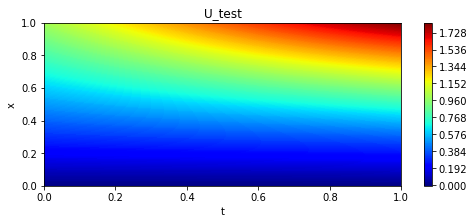

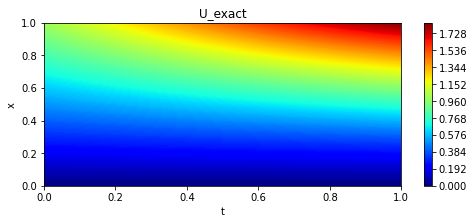

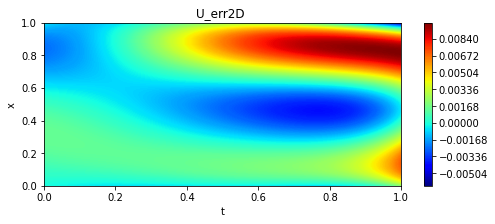

(100, 100) (100, 100) (100, 100) (100, 100)
[[0.       0.      ]
 [0.       0.010101]
 [0.       0.020202]
 [0.       0.030303]
 [0.       0.040404]
 [0.       0.050505]
 [0.       0.060606]
 [0.       0.070707]
 [0.       0.080808]
 [0.       0.090909]
 [0.       0.10101 ]
 [0.       0.111111]
 [0.       0.121212]
 [0.       0.131313]
 [0.       0.141414]
 [0.       0.151515]
 [0.       0.161616]
 [0.       0.171717]
 [0.       0.181818]
 [0.       0.191919]
 [0.       0.20202 ]
 [0.       0.212121]
 [0.       0.222222]
 [0.       0.232323]
 [0.       0.242424]
 [0.       0.252525]
 [0.       0.262626]
 [0.       0.272727]
 [0.       0.282828]
 [0.       0.292929]
 [0.       0.30303 ]
 [0.       0.313131]
 [0.       0.323232]
 [0.       0.333333]
 [0.       0.343434]
 [0.       0.353535]
 [0.       0.363636]
 [0.       0.373737]
 [0.       0.383838]
 [0.       0.393939]
 [0.       0.40404 ]
 [0.       0.414141]
 [0.       0.424242]
 [0.       0.434343]
 [0.       0.444444]
 [0.       

   1.746301e+00  1.768697e+00  1.790983e+00  1.813151e+00  1.835195e+00]] [[-8.940138e-05 -3.461448e-05  2.318246e-05  8.315497e-05  1.450367e-04
   2.084961e-04  2.732369e-04  3.389017e-04  4.047304e-04  4.709018e-04
   5.370284e-04  6.022015e-04  6.670764e-04  7.303496e-04  7.922443e-04
   8.525596e-04  9.108631e-04  9.667676e-04  1.020139e-03  1.070634e-03
   1.118328e-03  1.163176e-03  1.204015e-03  1.241353e-03  1.274995e-03
   1.304465e-03  1.330016e-03  1.351156e-03  1.367975e-03  1.380204e-03
   1.387903e-03  1.390476e-03  1.388400e-03  1.381377e-03  1.369318e-03
   1.352311e-03  1.330267e-03  1.303157e-03  1.270862e-03  1.233381e-03
   1.190953e-03  1.143756e-03  1.091195e-03  1.033776e-03  9.718272e-04
   9.049611e-04  8.335053e-04  7.575196e-04  6.773616e-04  5.930313e-04
   5.046478e-04  4.126285e-04  3.171521e-04  2.180994e-04  1.161857e-04
   1.135137e-05 -9.592675e-05 -2.054699e-04 -3.167415e-04 -4.296225e-04
  -5.439339e-04 -6.586030e-04 -7.741066e-04 -8.894910e-04 -1.0

It: 5002, Loss: 5.350e-05
It: 5003, Loss: 5.021e-05
It: 5004, Loss: 4.804e-05
It: 5005, Loss: 4.781e-05
It: 5006, Loss: 4.892e-05
It: 5007, Loss: 5.015e-05
It: 5008, Loss: 5.062e-05
It: 5009, Loss: 5.006e-05
It: 5010, Loss: 4.884e-05
It: 5011, Loss: 4.760e-05
It: 5012, Loss: 4.686e-05
It: 5013, Loss: 4.677e-05
It: 5014, Loss: 4.714e-05
It: 5015, Loss: 4.759e-05
It: 5016, Loss: 4.776e-05
It: 5017, Loss: 4.751e-05
It: 5018, Loss: 4.696e-05
It: 5019, Loss: 4.633e-05
It: 5020, Loss: 4.589e-05
It: 5021, Loss: 4.576e-05
It: 5022, Loss: 4.588e-05
It: 5023, Loss: 4.608e-05
It: 5024, Loss: 4.620e-05
It: 5025, Loss: 4.613e-05
It: 5026, Loss: 4.590e-05
It: 5027, Loss: 4.560e-05
It: 5028, Loss: 4.535e-05
It: 5029, Loss: 4.520e-05
It: 5030, Loss: 4.516e-05
It: 5031, Loss: 4.518e-05
It: 5032, Loss: 4.522e-05
It: 5033, Loss: 4.522e-05
It: 5034, Loss: 4.517e-05
It: 5035, Loss: 4.508e-05
It: 5036, Loss: 4.497e-05
It: 5037, Loss: 4.485e-05
It: 5038, Loss: 4.476e-05
It: 5039, Loss: 4.469e-05
It: 5040, Lo

It: 5318, Loss: 1.814e-04
It: 5319, Loss: 9.264e-05
It: 5320, Loss: 9.242e-05
It: 5321, Loss: 1.874e-04
It: 5322, Loss: 2.570e-04
It: 5323, Loss: 2.310e-04
It: 5324, Loss: 1.646e-04
It: 5325, Loss: 8.150e-05
It: 5326, Loss: 6.104e-05
It: 5327, Loss: 9.903e-05
It: 5328, Loss: 1.368e-04
It: 5329, Loss: 1.579e-04
It: 5330, Loss: 1.286e-04
It: 5331, Loss: 8.340e-05
It: 5332, Loss: 5.843e-05
It: 5333, Loss: 5.528e-05
It: 5334, Loss: 8.116e-05
It: 5335, Loss: 1.002e-04
It: 5336, Loss: 9.931e-05
It: 5337, Loss: 8.433e-05
It: 5338, Loss: 5.898e-05
It: 5339, Loss: 4.916e-05
It: 5340, Loss: 5.319e-05
It: 5341, Loss: 6.387e-05
It: 5342, Loss: 7.486e-05
It: 5343, Loss: 7.244e-05
It: 5344, Loss: 6.344e-05
It: 5345, Loss: 5.269e-05
It: 5346, Loss: 4.578e-05
It: 5347, Loss: 4.837e-05
It: 5348, Loss: 5.338e-05
It: 5349, Loss: 5.816e-05
It: 5350, Loss: 5.918e-05
It: 5351, Loss: 5.474e-05
It: 5352, Loss: 4.998e-05
It: 5353, Loss: 4.605e-05
It: 5354, Loss: 4.510e-05
It: 5355, Loss: 4.730e-05
It: 5356, Lo

It: 5634, Loss: 3.288e-03
It: 5635, Loss: 2.818e-03
It: 5636, Loss: 1.401e-03
It: 5637, Loss: 2.883e-04
It: 5638, Loss: 1.489e-04
It: 5639, Loss: 8.132e-04
It: 5640, Loss: 1.519e-03
It: 5641, Loss: 1.539e-03
It: 5642, Loss: 9.766e-04
It: 5643, Loss: 3.016e-04
It: 5644, Loss: 8.831e-05
It: 5645, Loss: 3.753e-04
It: 5646, Loss: 7.638e-04
It: 5647, Loss: 8.694e-04
It: 5648, Loss: 5.899e-04
It: 5649, Loss: 2.279e-04
It: 5650, Loss: 7.136e-05
It: 5651, Loss: 1.899e-04
It: 5652, Loss: 3.983e-04
It: 5653, Loss: 4.696e-04
It: 5654, Loss: 3.602e-04
It: 5655, Loss: 1.732e-04
It: 5656, Loss: 7.473e-05
It: 5657, Loss: 1.141e-04
It: 5658, Loss: 2.132e-04
It: 5659, Loss: 2.641e-04
It: 5660, Loss: 2.200e-04
It: 5661, Loss: 1.324e-04
It: 5662, Loss: 7.013e-05
It: 5663, Loss: 7.290e-05
It: 5664, Loss: 1.189e-04
It: 5665, Loss: 1.549e-04
It: 5666, Loss: 1.493e-04
It: 5667, Loss: 1.080e-04
It: 5668, Loss: 6.775e-05
It: 5669, Loss: 5.548e-05
It: 5670, Loss: 7.191e-05
It: 5671, Loss: 9.551e-05
It: 5672, Lo

It: 5950, Loss: 3.919e-05
It: 5951, Loss: 3.943e-05
It: 5952, Loss: 3.979e-05
It: 5953, Loss: 4.033e-05
It: 5954, Loss: 4.114e-05
It: 5955, Loss: 4.237e-05
It: 5956, Loss: 4.424e-05
It: 5957, Loss: 4.712e-05
It: 5958, Loss: 5.152e-05
It: 5959, Loss: 5.840e-05
It: 5960, Loss: 6.902e-05
It: 5961, Loss: 8.582e-05
It: 5962, Loss: 1.120e-04
It: 5963, Loss: 1.540e-04
It: 5964, Loss: 2.195e-04
It: 5965, Loss: 3.257e-04
It: 5966, Loss: 4.896e-04
It: 5967, Loss: 7.548e-04
It: 5968, Loss: 1.147e-03
It: 5969, Loss: 1.759e-03
It: 5970, Loss: 2.558e-03
It: 5971, Loss: 3.653e-03
It: 5972, Loss: 4.634e-03
It: 5973, Loss: 5.461e-03
It: 5974, Loss: 5.268e-03
It: 5975, Loss: 4.494e-03
It: 5976, Loss: 3.592e-03
It: 5977, Loss: 3.919e-03
It: 5978, Loss: 6.203e-03
It: 5979, Loss: 1.055e-02
It: 5980, Loss: 1.684e-02
It: 5981, Loss: 2.563e-02
It: 5982, Loss: 3.809e-02
It: 5983, Loss: 5.569e-02
It: 5984, Loss: 7.574e-02
It: 5985, Loss: 9.174e-02
It: 5986, Loss: 8.869e-02
It: 5987, Loss: 6.114e-02
It: 5988, Lo

It: 6266, Loss: 3.773e-04
It: 6267, Loss: 1.644e-02
It: 6268, Loss: 6.430e-04
It: 6269, Loss: 1.215e-02
It: 6270, Loss: 8.923e-04
It: 6271, Loss: 9.400e-03
It: 6272, Loss: 3.753e-04
It: 6273, Loss: 7.484e-03
It: 6274, Loss: 1.665e-04
It: 6275, Loss: 6.036e-03
It: 6276, Loss: 3.270e-04
It: 6277, Loss: 4.225e-03
It: 6278, Loss: 9.235e-04
It: 6279, Loss: 2.521e-03
It: 6280, Loss: 1.779e-03
It: 6281, Loss: 1.012e-03
It: 6282, Loss: 2.244e-03
It: 6283, Loss: 1.704e-04
It: 6284, Loss: 2.147e-03
It: 6285, Loss: 1.730e-04
It: 6286, Loss: 1.456e-03
It: 6287, Loss: 5.894e-04
It: 6288, Loss: 6.143e-04
It: 6289, Loss: 1.014e-03
It: 6290, Loss: 1.312e-04
It: 6291, Loss: 1.017e-03
It: 6292, Loss: 1.099e-04
It: 6293, Loss: 6.476e-04
It: 6294, Loss: 3.724e-04
It: 6295, Loss: 2.452e-04
It: 6296, Loss: 5.565e-04
It: 6297, Loss: 5.465e-05
It: 6298, Loss: 4.833e-04
It: 6299, Loss: 1.291e-04
It: 6300, Loss: 2.616e-04
It: 6301, Loss: 2.737e-04
It: 6302, Loss: 8.272e-05
It: 6303, Loss: 3.097e-04
It: 6304, Lo

It: 6582, Loss: 4.167e-05
It: 6583, Loss: 4.292e-05
It: 6584, Loss: 4.499e-05
It: 6585, Loss: 4.804e-05
It: 6586, Loss: 5.245e-05
It: 6587, Loss: 5.913e-05
It: 6588, Loss: 6.970e-05
It: 6589, Loss: 8.653e-05
It: 6590, Loss: 1.130e-04
It: 6591, Loss: 1.546e-04
It: 6592, Loss: 2.197e-04
It: 6593, Loss: 3.229e-04
It: 6594, Loss: 4.876e-04
It: 6595, Loss: 7.534e-04
It: 6596, Loss: 1.182e-03
It: 6597, Loss: 1.879e-03
It: 6598, Loss: 3.005e-03
It: 6599, Loss: 4.835e-03
It: 6600, Loss: 7.756e-03
It: 6601, Loss: 1.240e-02
It: 6602, Loss: 1.942e-02
It: 6603, Loss: 2.964e-02
It: 6604, Loss: 4.254e-02
It: 6605, Loss: 5.626e-02
It: 6606, Loss: 6.362e-02
It: 6607, Loss: 5.766e-02
It: 6608, Loss: 3.501e-02
It: 6609, Loss: 9.424e-03
It: 6610, Loss: 1.746e-04
It: 6611, Loss: 1.082e-02
It: 6612, Loss: 2.202e-02
It: 6613, Loss: 1.614e-02
It: 6614, Loss: 2.677e-03
It: 6615, Loss: 1.722e-03
It: 6616, Loss: 1.049e-02
It: 6617, Loss: 1.038e-02
It: 6618, Loss: 1.903e-03
It: 6619, Loss: 1.355e-03
It: 6620, Lo

It: 6898, Loss: 9.325e-05
It: 6899, Loss: 1.321e-04
It: 6900, Loss: 1.986e-04
It: 6901, Loss: 3.079e-04
It: 6902, Loss: 4.986e-04
It: 6903, Loss: 8.072e-04
It: 6904, Loss: 1.353e-03
It: 6905, Loss: 2.193e-03
It: 6906, Loss: 3.663e-03
It: 6907, Loss: 5.608e-03
It: 6908, Loss: 8.695e-03
It: 6909, Loss: 1.120e-02
It: 6910, Loss: 1.362e-02
It: 6911, Loss: 1.169e-02
It: 6912, Loss: 7.568e-03
It: 6913, Loss: 2.353e-03
It: 6914, Loss: 2.691e-04
It: 6915, Loss: 1.953e-03
It: 6916, Loss: 4.723e-03
It: 6917, Loss: 5.835e-03
It: 6918, Loss: 3.564e-03
It: 6919, Loss: 8.774e-04
It: 6920, Loss: 3.103e-04
It: 6921, Loss: 1.853e-03
It: 6922, Loss: 3.181e-03
It: 6923, Loss: 2.328e-03
It: 6924, Loss: 6.984e-04
It: 6925, Loss: 1.749e-04
It: 6926, Loss: 1.062e-03
It: 6927, Loss: 1.855e-03
It: 6928, Loss: 1.329e-03
It: 6929, Loss: 3.531e-04
It: 6930, Loss: 1.310e-04
It: 6931, Loss: 7.252e-04
It: 6932, Loss: 1.124e-03
It: 6933, Loss: 7.116e-04
It: 6934, Loss: 1.494e-04
It: 6935, Loss: 1.462e-04
It: 6936, Lo

It: 7214, Loss: 3.683e-03
It: 7215, Loss: 1.234e-02
It: 7216, Loss: 1.340e-02
It: 7217, Loss: 5.408e-03
It: 7218, Loss: 8.458e-05
It: 7219, Loss: 3.836e-03
It: 7220, Loss: 7.811e-03
It: 7221, Loss: 4.350e-03
It: 7222, Loss: 2.149e-04
It: 7223, Loss: 2.297e-03
It: 7224, Loss: 4.768e-03
It: 7225, Loss: 2.186e-03
It: 7226, Loss: 7.662e-05
It: 7227, Loss: 2.092e-03
It: 7228, Loss: 2.839e-03
It: 7229, Loss: 6.321e-04
It: 7230, Loss: 4.153e-04
It: 7231, Loss: 1.983e-03
It: 7232, Loss: 1.321e-03
It: 7233, Loss: 7.344e-05
It: 7234, Loss: 8.753e-04
It: 7235, Loss: 1.313e-03
It: 7236, Loss: 2.822e-04
It: 7237, Loss: 2.427e-04
It: 7238, Loss: 9.609e-04
It: 7239, Loss: 5.321e-04
It: 7240, Loss: 5.866e-05
It: 7241, Loss: 5.414e-04
It: 7242, Loss: 5.787e-04
It: 7243, Loss: 7.848e-05
It: 7244, Loss: 2.310e-04
It: 7245, Loss: 4.844e-04
It: 7246, Loss: 1.643e-04
It: 7247, Loss: 7.863e-05
It: 7248, Loss: 3.370e-04
It: 7249, Loss: 2.244e-04
It: 7250, Loss: 4.122e-05
It: 7251, Loss: 2.007e-04
It: 7252, Lo

It: 7530, Loss: 3.242e-05
It: 7531, Loss: 3.223e-05
It: 7532, Loss: 3.210e-05
It: 7533, Loss: 3.206e-05
It: 7534, Loss: 3.208e-05
It: 7535, Loss: 3.214e-05
It: 7536, Loss: 3.219e-05
It: 7537, Loss: 3.221e-05
It: 7538, Loss: 3.219e-05
It: 7539, Loss: 3.214e-05
It: 7540, Loss: 3.205e-05
It: 7541, Loss: 3.196e-05
It: 7542, Loss: 3.187e-05
It: 7543, Loss: 3.178e-05
It: 7544, Loss: 3.171e-05
It: 7545, Loss: 3.166e-05
It: 7546, Loss: 3.162e-05
It: 7547, Loss: 3.159e-05
It: 7548, Loss: 3.157e-05
It: 7549, Loss: 3.156e-05
It: 7550, Loss: 3.155e-05
It: 7551, Loss: 3.154e-05
It: 7552, Loss: 3.152e-05
It: 7553, Loss: 3.150e-05
It: 7554, Loss: 3.148e-05
It: 7555, Loss: 3.145e-05
It: 7556, Loss: 3.141e-05
It: 7557, Loss: 3.138e-05
It: 7558, Loss: 3.134e-05
It: 7559, Loss: 3.130e-05
It: 7560, Loss: 3.127e-05
It: 7561, Loss: 3.123e-05
It: 7562, Loss: 3.120e-05
It: 7563, Loss: 3.117e-05
It: 7564, Loss: 3.114e-05
It: 7565, Loss: 3.111e-05
It: 7566, Loss: 3.108e-05
It: 7567, Loss: 3.105e-05
It: 7568, Lo

It: 7846, Loss: 1.173e-04
It: 7847, Loss: 1.631e-04
It: 7848, Loss: 2.344e-04
It: 7849, Loss: 3.384e-04
It: 7850, Loss: 5.098e-04
It: 7851, Loss: 7.596e-04
It: 7852, Loss: 1.171e-03
It: 7853, Loss: 1.726e-03
It: 7854, Loss: 2.631e-03
It: 7855, Loss: 3.661e-03
It: 7856, Loss: 5.194e-03
It: 7857, Loss: 6.241e-03
It: 7858, Loss: 7.290e-03
It: 7859, Loss: 6.512e-03
It: 7860, Loss: 4.980e-03
It: 7861, Loss: 2.489e-03
It: 7862, Loss: 6.986e-04
It: 7863, Loss: 2.443e-04
It: 7864, Loss: 9.943e-04
It: 7865, Loss: 2.159e-03
It: 7866, Loss: 2.639e-03
It: 7867, Loss: 2.282e-03
It: 7868, Loss: 1.187e-03
It: 7869, Loss: 3.429e-04
It: 7870, Loss: 2.465e-04
It: 7871, Loss: 7.338e-04
It: 7872, Loss: 1.229e-03
It: 7873, Loss: 1.197e-03
It: 7874, Loss: 7.580e-04
It: 7875, Loss: 2.765e-04
It: 7876, Loss: 1.515e-04
It: 7877, Loss: 3.747e-04
It: 7878, Loss: 6.304e-04
It: 7879, Loss: 6.557e-04
It: 7880, Loss: 4.235e-04
It: 7881, Loss: 1.814e-04
It: 7882, Loss: 1.172e-04
It: 7883, Loss: 2.254e-04
It: 7884, Lo

It: 8162, Loss: 8.519e-05
It: 8163, Loss: 8.642e-05
It: 8164, Loss: 7.837e-05
It: 8165, Loss: 6.605e-05
It: 8166, Loss: 5.297e-05
It: 8167, Loss: 4.262e-05
It: 8168, Loss: 3.636e-05
It: 8169, Loss: 3.457e-05
It: 8170, Loss: 3.665e-05
It: 8171, Loss: 4.150e-05
It: 8172, Loss: 4.776e-05
It: 8173, Loss: 5.398e-05
It: 8174, Loss: 5.929e-05
It: 8175, Loss: 6.322e-05
It: 8176, Loss: 6.684e-05
It: 8177, Loss: 7.187e-05
It: 8178, Loss: 8.134e-05
It: 8179, Loss: 9.874e-05
It: 8180, Loss: 1.288e-04
It: 8181, Loss: 1.777e-04
It: 8182, Loss: 2.555e-04
It: 8183, Loss: 3.772e-04
It: 8184, Loss: 5.681e-04
It: 8185, Loss: 8.664e-04
It: 8186, Loss: 1.336e-03
It: 8187, Loss: 2.067e-03
It: 8188, Loss: 3.209e-03
It: 8189, Loss: 4.939e-03
It: 8190, Loss: 7.519e-03
It: 8191, Loss: 1.108e-02
It: 8192, Loss: 1.565e-02
It: 8193, Loss: 2.030e-02
It: 8194, Loss: 2.343e-02
It: 8195, Loss: 2.206e-02
It: 8196, Loss: 1.532e-02
It: 8197, Loss: 5.872e-03
It: 8198, Loss: 2.676e-04
It: 8199, Loss: 1.922e-03
It: 8200, Lo

It: 8478, Loss: 6.303e-05
It: 8479, Loss: 8.075e-05
It: 8480, Loss: 1.045e-04
It: 8481, Loss: 1.446e-04
It: 8482, Loss: 2.015e-04
It: 8483, Loss: 2.935e-04
It: 8484, Loss: 4.250e-04
It: 8485, Loss: 6.314e-04
It: 8486, Loss: 9.105e-04
It: 8487, Loss: 1.322e-03
It: 8488, Loss: 1.789e-03
It: 8489, Loss: 2.364e-03
It: 8490, Loss: 2.714e-03
It: 8491, Loss: 2.860e-03
It: 8492, Loss: 2.359e-03
It: 8493, Loss: 1.575e-03
It: 8494, Loss: 6.991e-04
It: 8495, Loss: 2.342e-04
It: 8496, Loss: 2.707e-04
It: 8497, Loss: 5.983e-04
It: 8498, Loss: 8.834e-04
It: 8499, Loss: 8.779e-04
It: 8500, Loss: 6.618e-04
It: 8501, Loss: 4.003e-04
It: 8502, Loss: 2.950e-04
It: 8503, Loss: 3.241e-04
It: 8504, Loss: 3.663e-04
It: 8505, Loss: 3.282e-04
It: 8506, Loss: 2.431e-04
It: 8507, Loss: 2.084e-04
It: 8508, Loss: 2.430e-04
It: 8509, Loss: 2.851e-04
It: 8510, Loss: 2.533e-04
It: 8511, Loss: 1.576e-04
It: 8512, Loss: 7.721e-05
It: 8513, Loss: 7.785e-05
It: 8514, Loss: 1.447e-04
It: 8515, Loss: 1.990e-04
It: 8516, Lo

It: 8794, Loss: 4.178e-05
It: 8795, Loss: 1.538e-04
It: 8796, Loss: 1.013e-04
It: 8797, Loss: 4.110e-05
It: 8798, Loss: 1.226e-04
It: 8799, Loss: 8.003e-05
It: 8800, Loss: 3.754e-05
It: 8801, Loss: 9.577e-05
It: 8802, Loss: 6.242e-05
It: 8803, Loss: 3.499e-05
It: 8804, Loss: 7.806e-05
It: 8805, Loss: 5.141e-05
It: 8806, Loss: 3.245e-05
It: 8807, Loss: 6.434e-05
It: 8808, Loss: 4.514e-05
It: 8809, Loss: 3.294e-05
It: 8810, Loss: 5.531e-05
It: 8811, Loss: 3.950e-05
It: 8812, Loss: 3.101e-05
It: 8813, Loss: 4.793e-05
It: 8814, Loss: 3.667e-05
It: 8815, Loss: 3.068e-05
It: 8816, Loss: 4.233e-05
It: 8817, Loss: 3.351e-05
It: 8818, Loss: 2.939e-05
It: 8819, Loss: 3.838e-05
It: 8820, Loss: 3.233e-05
It: 8821, Loss: 2.937e-05
It: 8822, Loss: 3.566e-05
It: 8823, Loss: 3.102e-05
It: 8824, Loss: 2.884e-05
It: 8825, Loss: 3.382e-05
It: 8826, Loss: 3.089e-05
It: 8827, Loss: 2.933e-05
It: 8828, Loss: 3.290e-05
It: 8829, Loss: 3.083e-05
It: 8830, Loss: 2.984e-05
It: 8831, Loss: 3.298e-05
It: 8832, Lo

It: 9110, Loss: 2.707e-05
It: 9111, Loss: 2.693e-05
It: 9112, Loss: 2.680e-05
It: 9113, Loss: 2.665e-05
It: 9114, Loss: 2.654e-05
It: 9115, Loss: 2.651e-05
It: 9116, Loss: 2.654e-05
It: 9117, Loss: 2.658e-05
It: 9118, Loss: 2.660e-05
It: 9119, Loss: 2.661e-05
It: 9120, Loss: 2.660e-05
It: 9121, Loss: 2.657e-05
It: 9122, Loss: 2.650e-05
It: 9123, Loss: 2.640e-05
It: 9124, Loss: 2.632e-05
It: 9125, Loss: 2.624e-05
It: 9126, Loss: 2.618e-05
It: 9127, Loss: 2.613e-05
It: 9128, Loss: 2.608e-05
It: 9129, Loss: 2.605e-05
It: 9130, Loss: 2.603e-05
It: 9131, Loss: 2.601e-05
It: 9132, Loss: 2.598e-05
It: 9133, Loss: 2.597e-05
It: 9134, Loss: 2.596e-05
It: 9135, Loss: 2.596e-05
It: 9136, Loss: 2.596e-05
It: 9137, Loss: 2.595e-05
It: 9138, Loss: 2.595e-05
It: 9139, Loss: 2.596e-05
It: 9140, Loss: 2.597e-05
It: 9141, Loss: 2.601e-05
It: 9142, Loss: 2.606e-05
It: 9143, Loss: 2.614e-05
It: 9144, Loss: 2.628e-05
It: 9145, Loss: 2.651e-05
It: 9146, Loss: 2.686e-05
It: 9147, Loss: 2.739e-05
It: 9148, Lo

It: 9426, Loss: 1.286e-04
It: 9427, Loss: 1.769e-04
It: 9428, Loss: 2.600e-04
It: 9429, Loss: 3.751e-04
It: 9430, Loss: 5.282e-04
It: 9431, Loss: 7.404e-04
It: 9432, Loss: 1.050e-03
It: 9433, Loss: 1.515e-03
It: 9434, Loss: 2.200e-03
It: 9435, Loss: 3.184e-03
It: 9436, Loss: 4.493e-03
It: 9437, Loss: 6.107e-03
It: 9438, Loss: 7.739e-03
It: 9439, Loss: 8.919e-03
It: 9440, Loss: 8.793e-03
It: 9441, Loss: 6.925e-03
It: 9442, Loss: 3.705e-03
It: 9443, Loss: 8.578e-04
It: 9444, Loss: 6.609e-05
It: 9445, Loss: 1.322e-03
It: 9446, Loss: 2.738e-03
It: 9447, Loss: 2.502e-03
It: 9448, Loss: 9.577e-04
It: 9449, Loss: 3.867e-05
It: 9450, Loss: 6.391e-04
It: 9451, Loss: 1.468e-03
It: 9452, Loss: 1.132e-03
It: 9453, Loss: 2.209e-04
It: 9454, Loss: 1.250e-04
It: 9455, Loss: 7.283e-04
It: 9456, Loss: 8.170e-04
It: 9457, Loss: 2.567e-04
It: 9458, Loss: 4.897e-05
It: 9459, Loss: 4.151e-04
It: 9460, Loss: 5.381e-04
It: 9461, Loss: 1.902e-04
It: 9462, Loss: 3.854e-05
It: 9463, Loss: 2.758e-04
It: 9464, Lo

It: 9742, Loss: 1.090e-03
It: 9743, Loss: 1.442e-03
It: 9744, Loss: 1.121e-03
It: 9745, Loss: 5.704e-04
It: 9746, Loss: 2.870e-04
It: 9747, Loss: 4.758e-04
It: 9748, Loss: 8.803e-04
It: 9749, Loss: 1.120e-03
It: 9750, Loss: 1.145e-03
It: 9751, Loss: 1.135e-03
It: 9752, Loss: 1.366e-03
It: 9753, Loss: 1.864e-03
It: 9754, Loss: 2.371e-03
It: 9755, Loss: 2.565e-03
It: 9756, Loss: 2.181e-03
It: 9757, Loss: 1.371e-03
It: 9758, Loss: 5.410e-04
It: 9759, Loss: 1.734e-04
It: 9760, Loss: 3.765e-04
It: 9761, Loss: 7.595e-04
It: 9762, Loss: 8.266e-04
It: 9763, Loss: 4.755e-04
It: 9764, Loss: 1.236e-04
It: 9765, Loss: 1.533e-04
It: 9766, Loss: 4.149e-04
It: 9767, Loss: 4.712e-04
It: 9768, Loss: 2.314e-04
It: 9769, Loss: 5.327e-05
It: 9770, Loss: 1.465e-04
It: 9771, Loss: 2.789e-04
It: 9772, Loss: 2.162e-04
It: 9773, Loss: 8.927e-05
It: 9774, Loss: 1.017e-04
It: 9775, Loss: 1.660e-04
It: 9776, Loss: 1.242e-04
It: 9777, Loss: 5.496e-05
It: 9778, Loss: 8.629e-05
It: 9779, Loss: 1.384e-04
It: 9780, Lo

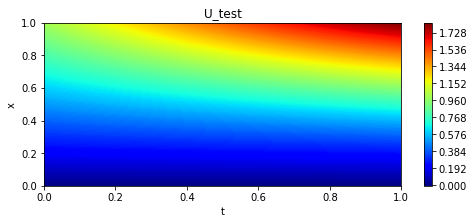

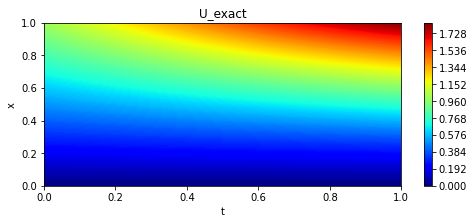

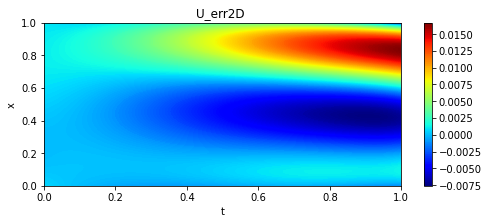

(100, 100) (100, 100) (100, 100) (100, 100)
[[0.       0.      ]
 [0.       0.010101]
 [0.       0.020202]
 [0.       0.030303]
 [0.       0.040404]
 [0.       0.050505]
 [0.       0.060606]
 [0.       0.070707]
 [0.       0.080808]
 [0.       0.090909]
 [0.       0.10101 ]
 [0.       0.111111]
 [0.       0.121212]
 [0.       0.131313]
 [0.       0.141414]
 [0.       0.151515]
 [0.       0.161616]
 [0.       0.171717]
 [0.       0.181818]
 [0.       0.191919]
 [0.       0.20202 ]
 [0.       0.212121]
 [0.       0.222222]
 [0.       0.232323]
 [0.       0.242424]
 [0.       0.252525]
 [0.       0.262626]
 [0.       0.272727]
 [0.       0.282828]
 [0.       0.292929]
 [0.       0.30303 ]
 [0.       0.313131]
 [0.       0.323232]
 [0.       0.333333]
 [0.       0.343434]
 [0.       0.353535]
 [0.       0.363636]
 [0.       0.373737]
 [0.       0.383838]
 [0.       0.393939]
 [0.       0.40404 ]
 [0.       0.414141]
 [0.       0.424242]
 [0.       0.434343]
 [0.       0.444444]
 [0.       

 [1.       1.      ]] [[0.       0.010101 0.020202 0.030303 0.040404 0.050505 0.060606 0.070707
  0.080808 0.090909 0.10101  0.111111 0.121212 0.131313 0.141414 0.151515
  0.161616 0.171717 0.181818 0.191919 0.20202  0.212121 0.222222 0.232323
  0.242424 0.252525 0.262626 0.272727 0.282828 0.292929 0.30303  0.313131
  0.323232 0.333333 0.343434 0.353535 0.363636 0.373737 0.383838 0.393939
  0.40404  0.414141 0.424242 0.434343 0.444444 0.454545 0.464646 0.474747
  0.484848 0.494949 0.505051 0.515152 0.525253 0.535354 0.545455 0.555556
  0.565657 0.575758 0.585859 0.59596  0.606061 0.616162 0.626263 0.636364
  0.646465 0.656566 0.666667 0.676768 0.686869 0.69697  0.707071 0.717172
  0.727273 0.737374 0.747475 0.757576 0.767677 0.777778 0.787879 0.79798
  0.808081 0.818182 0.828283 0.838384 0.848485 0.858586 0.868687 0.878788
  0.888889 0.89899  0.909091 0.919192 0.929293 0.939394 0.949495 0.959596
  0.969697 0.979798 0.989899 1.      ]
 [0.       0.010102 0.020206 0.030312 0.040421 0.050

   1.750845e+00  1.772707e+00  1.794400e+00  1.815916e+00  1.837247e+00]] [[ 5.781837e-04  5.184403e-04  4.622433e-04  4.098015e-04  3.602802e-04
   3.140969e-04  2.708937e-04  2.303393e-04  1.928582e-04  1.576868e-04
   1.250188e-04  9.488397e-05  6.696943e-05  4.134967e-05  1.796508e-05
  -3.288641e-06 -2.253071e-05 -3.950779e-05 -5.465204e-05 -6.762072e-05
  -7.898007e-05 -8.788073e-05 -9.521676e-05 -1.004517e-04 -1.037794e-04
  -1.051847e-04 -1.047275e-04 -1.023330e-04 -9.806108e-05 -9.203078e-05
  -8.415273e-05 -7.436733e-05 -6.267459e-05 -4.931291e-05 -3.413329e-05
  -1.698672e-05  1.679767e-06  2.195558e-05  4.401954e-05  6.754380e-05
   9.279661e-05  1.193905e-04  1.474149e-04  1.766910e-04  2.073977e-04
   2.390580e-04  2.720296e-04  3.056866e-04  3.402378e-04  3.757724e-04
   4.116050e-04  4.481529e-04  4.849988e-04  5.220235e-04  5.590482e-04
   5.961325e-04  6.327996e-04  6.692879e-04  7.054186e-04  7.407147e-04
   7.754149e-04  8.090421e-04  8.416561e-04  8.728992e-04  9.0

In [2]:

def ElasImag(nIter = 10000, print_period = 10000, plot_period = 10000):

    t_range = np.array([a, b])
    x_range = np.array([c, d])

    layers_U = [2, 40, 40, 40,40, 40,1]
    layers_V1 =[2, 40, 40, 40,40, 40,1]
    layers_V2 =[2, 40, 40, 40,40, 40,1]
    layers_V3 =[2, 40, 40, 40,40, 40,1]
    layers_V4 =[2, 40, 40, 40,40, 40,1]
    layers_V5 =[2, 40, 40, 40,40, 40,1]
    layers_W1 =[2, 40, 40, 40,40, 40,1]
    layers_W2 =[2, 40, 40, 40,40, 40,1]
    layers_W3 =[2, 40, 40, 40,40, 40,1]
    layers_W4 =[2, 40, 40, 40,40, 40,1]
    layers_W5 =[2, 40, 40, 40,40, 40,1]
    f = open("loss_record.txt","w")

    tt = np.linspace(t_range[0], t_range[1], 5000)
    tt= np.reshape(tt, [-1, 1])
    xx = np.linspace(x_range[0], x_range[1], 5000)
    xx = np.reshape(xx, [-1, 1])
    Xx=tf.concat([tt,xx],1)
    figure_path = './Figure/'
    if not os.path.isdir(figure_path):
        os.makedirs(figure_path)

    num_train_tps =5000
    num_test_tps =100

    # Create the model
    model = PhysicsInformedNN(layers_U, layers_V1,layers_V2,layers_V3,layers_V4,layers_V5, layers_W1,layers_W2,layers_W3,layers_W4,layers_W5,x_range,t_range, f, num_train_tps)

    it_array = []
    loss_array = []
    losses_array = []

    start_time = time.time()

    for it in range(1, nIter+1):
        loss, losses = model.train(Xx, it, it%print_period==0)
        if (it%print_period==0):
            loss_array.append(loss)
            losses_array.append(losses)
            it_array.append(it)
            dt = time.time() - start_time
            print('Time: ', dt)
            start_time = time.time()
            if (it % plot_period == 0 or it == print_period):
                print("Result Plotted...")
                X_test, U_test, V1_test, V2_test, V3_test,V4_test,V5_test,W1_test,W2_test,W3_test,W4_test,W5_test, f_test, \
                e1_test,e2_test, e3_test,e4_test, e5_test,e6_test, e7_test,e8_test, e9_test,e10_test= model.test(num_test_tps)
                # print(X_test,X_test.shape)
                # print(U_test.shape)
                U_exact = X_test[:,1:]+X_test[:,1:] * np.sin(X_test[:, 0:1] * X_test[:, 1:])
                l2error = np.linalg.norm(U_test- U_exact , 2) / np.linalg.norm(U_exact , 2)
                print('L2 error: ', l2error)
                plt.figure(figsize=(8, 3))
                figtopic = 'U_test'
                t2D = np.reshape(X_test[:, 0:1], [num_test_tps, num_test_tps])
                x2D = np.reshape(X_test[:, 1:], [num_test_tps, num_test_tps])
                U_test2D = np.reshape(U_test, [num_test_tps, num_test_tps])
                cs = plt.contourf(t2D,x2D , U_test2D, 300, cmap=plt.cm.jet)
                plt.colorbar(cs)
                plt.xlabel('t')
                plt.ylabel('x')
                plt.title(figtopic)
                plt.show()
                plt.figure(figsize=(8, 3))
                figtopic = 'U_exact'
                t2D = np.reshape(X_test[:, 0:1], [num_test_tps, num_test_tps])
                x2D = np.reshape(X_test[:, 1:], [num_test_tps, num_test_tps])
                U_exact =X_test[:,1:]+X_test[:,1:] * np.sin(X_test[:, 0:1] * X_test[:, 1:])
                U_exact2D = np.reshape(U_exact, [num_test_tps, num_test_tps])
                cs = plt.contourf(t2D,x2D ,U_exact2D, 300, cmap=plt.cm.jet)
                plt.colorbar(cs)
                plt.xlabel('t')
                plt.ylabel('x')
                plt.title(figtopic)
                plt.show()
                plt.figure(figsize=(8, 3))
                figtopic = 'U_err2D '
                t2D = np.reshape(X_test[:, 0:1], [num_test_tps, num_test_tps])
                x2D = np.reshape(X_test[:, 1:], [num_test_tps, num_test_tps])
                U_exact =X_test[:,1:]+X_test[:,1:] * np.sin(X_test[:, 0:1] * X_test[:, 1:])
                U_exact2D = np.reshape(U_exact, [num_test_tps, num_test_tps])
                U_test2D = np.reshape(U_test, [num_test_tps, num_test_tps])
                U_err2D = U_test2D-U_exact2D
                cs = plt.contourf(t2D,x2D , U_err2D, 300, cmap=plt.cm.jet)
                plt.colorbar(cs)
                plt.xlabel('t')
                plt.ylabel('x')
                plt.title(figtopic)
                plt.show()
                print(t2D.shape,x2D.shape, U_exact2D.shape,U_test2D .shape)
                print(X_test,U_exact2D, U_test2D,U_err2D)
                
ElasImag(nIter =10000, print_period =5000, plot_period =5000)